### PCA 主成分分析

通过计算多维的概率密度 >> 低维的概率密度

#### 目录
- iras 4维的随机森林，并查看importance。 **无需数据归一化**
- iras 降维 3维的随机森林
- 光谱 3700 >> 8维

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [175]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target
label = ["Sepal.Length","Sepal.width","Petal.length","Petal.width"]

In [176]:
X = pd.DataFrame(X, columns=label)  

In [179]:
#拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)
#通过RandomForestClassifier进行训练
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [180]:
# 调参
param_grid = {
    'n_estimators':[5,10,15,20],
    'max_features':[1,2,3,4],
    'criterion':['gini','entropy']
}

rf=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 1, 'n_estimators': 10}

In [181]:
# 用最佳参数重新训练模型
rfc = RandomForestClassifier(criterion='gini',max_features=1,n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=10)

In [177]:
# #归一化
# from sklearn.preprocessing import StandardScaler
# X_norm = StandardScaler().fit_transform(X)

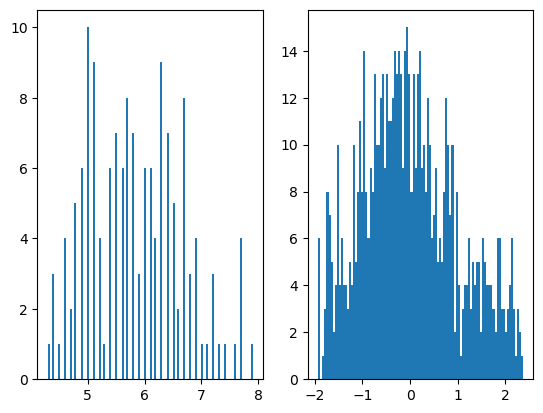

In [178]:
#查看维度数据

#fig1 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(X.loc[:,'Sepal.Length'],bins=100)#X有四个维度 取一个
plt.subplot(122)
plt.hist(X_norm[:,1],bins=100)
plt.show()

#### 降维（原维度重新组合）

[0.72962445 0.22850762]


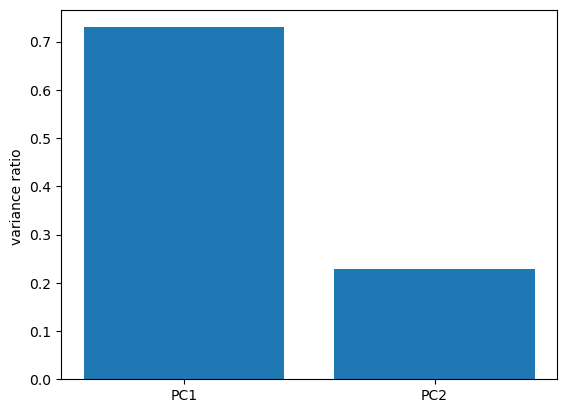

In [139]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

var_ratio = pca.explained_variance_ratio_ #计算比例
print(var_ratio)

#主成分
#fig2 = plt.figure()
plt.bar([1,2],var_ratio)
plt.xticks([1,2],['PC1','PC2'])
plt.ylabel("variance ratio ")
plt.show()

In [140]:
#拆分数据
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state= 42)
#通过RandomForestClassifier进行训练
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
# 调参
param_grid = {
    'n_estimators':[5,10,15,20],
    'max_features':[1,2,3,4],
    'criterion':['gini','entropy']
}

rf=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 1, 'n_estimators': 5}

In [142]:
# 用最佳参数重新训练模型
rfc = RandomForestClassifier(criterion='entropy',max_features=1,n_estimators=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=1, n_estimators=5)

In [143]:
import pandas as pd
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rfc.feature_importances_
features = features.sort_values(by =['importance'], ascending=False)

# 显示最重要的前10个特征变量
features.head(20)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.90      1.00      0.95        19
           2       1.00      0.89      0.94        18

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



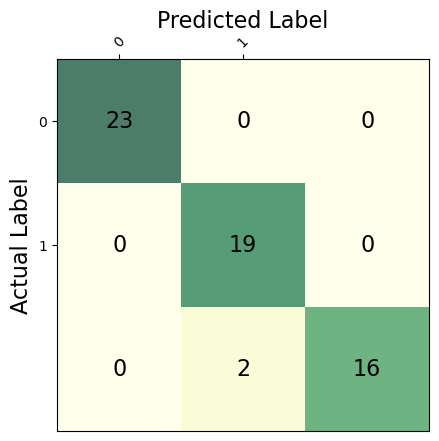

In [78]:
# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
#print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [49]:
iris_dataset = load_iris()

X = iris_dataset.data
Species = iris_dataset.target
label = ["sepal.length","sepal.width","petal.length","petal.width"]

In [50]:
credit_df = pd.DataFrame(X, columns=label)  
credit_df["Species"] = y
credit_df

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
print(X.shape,y.shape)#打印X，y的维度

(150, 4) (150,)


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

### 光谱数据再降维

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [157]:
print("Reading in LAMOST data...")
X = np.load('./data/fluxs.npy')
y = np.load('./data/sclss.npy')

Reading in LAMOST data...


In [122]:
# #归一化
# feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
# min_max_scaler = MinMaxScaler()
# X_minmax = min_max_scaler.fit_transform(X)
# X_minmax = pd.DataFrame(X_minmax, columns=feature_names)

In [158]:
data = pd.DataFrame(X, columns=range(X.shape[1]))
data["label"]=y

In [159]:
X = data.drop(["label"],axis=1)
y = data.loc[:,"label"]
print(X.shape,y.shape)#打印X，y的维度

(700, 3700) (700,)


In [160]:
#数据标准化处理
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [167]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_norm)

var_ratio = pca.explained_variance_ratio_#计算比例
print(var_ratio)

[0.6686809  0.2677223  0.03416185 0.01124271]


In [168]:
X_pca.shape

(700, 4)

In [169]:
#拆分数据
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state= 42)
#通过RandomForestClassifier进行训练
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [170]:
# 调参
param_grid = {
    'n_estimators':[5,10,15,20],
    'max_features':[1,2,3,4],
    'criterion':['gini','entropy']
}

rf=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 1, 'n_estimators': 10}

In [171]:
# 用最佳参数重新训练模型
rfc = RandomForestClassifier(criterion='gini',max_features=1,n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=10)

              precision    recall  f1-score   support

           A       0.88      0.77      0.82        47
           B       0.82      0.80      0.81        40
           F       0.62      0.79      0.70        38
           G       0.82      0.71      0.76        38
           K       0.82      0.92      0.87        36
           M       0.95      0.83      0.89        48
           O       0.89      1.00      0.94        33

    accuracy                           0.82       280
   macro avg       0.83      0.83      0.83       280
weighted avg       0.83      0.82      0.83       280



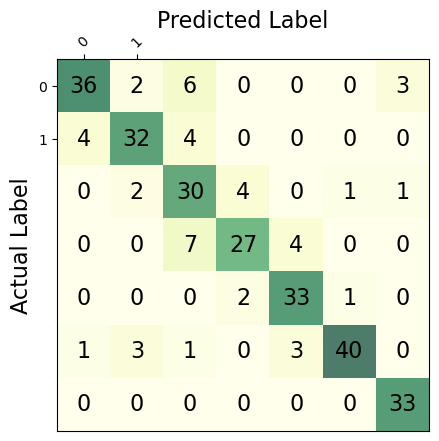

In [172]:
# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
#print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()